In [1]:
import scipy.io.wavfile as wavfile
from scipy import signal

In [2]:
classes = ["Alarm", "Blender", "Microwave", "Music", "Silence", "Unknown", "Vacuum"]
samples_per_class = 20

In [23]:
fs,y=wavfile.read("Data/Silence/Silence_2.wav")
print(fs)
print(len(y))

44100
1367078


In [29]:
import librosa
from scipy.fftpack import fft
import matplotlib.pyplot as plt

def fft_method(audio, sampling_rate):
    # variables
    T = 1/sampling_rate
    N = len(audio)
    max_val = 1.0/(2.0*T) # max frequency spectrum of the FFT.
    num_vals = N//2  
    
    # calculate fft
    yf_all = fft(audio)
    
    xf = np.linspace(0.0, max_val, num_vals)
    yf = 2.0/N * np.abs(yf_all[0:num_vals])
    
    return xf, yf

ROOT_DIR = './Data/'
CSV_PATH = './dataset/train_test_split.csv'

file_path = f"{ROOT_DIR}/Alarm/Alarm_6.wav"
samples, sampling_rate = librosa.load(file_path, sr=None, mono=True, offset=0.0, duration=None)

len(samples), sampling_rate

(1358258, 44100)

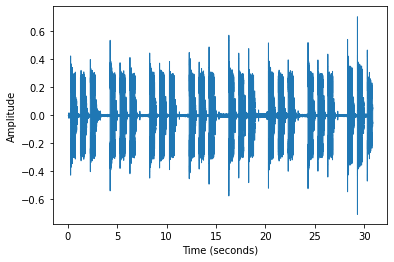

In [31]:
import librosa.display

plt.figure()
librosa.display.waveshow(samples, sr=sampling_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

679129
679129
[0.00000000e+00 3.24681062e-02 6.49362123e-02 ... 2.20499351e+04
 2.20499675e+04 2.20500000e+04]
<class 'numpy.ndarray'>


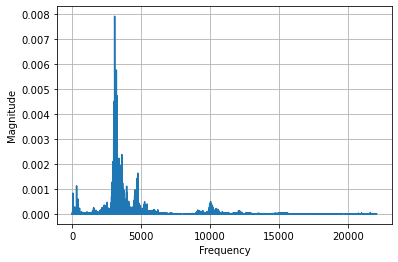

In [33]:
xf, yf = fft_method(samples, sampling_rate)
print(len(xf))
print(len(yf))
print(xf)
print(type(yf))

#fig, ax = plt.subplots()
plt.plot(xf, yf)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [34]:
new_yf = []
for i, fre in enumerate(xf):
    tmp = yf[i]
    if fre > 8000:
        tmp = 0.0
    new_yf.append(tmp)
    
new_yf = np.asarray(new_yf)
print(new_yf)

[6.25738664e-07 2.46759896e-06 1.20251309e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


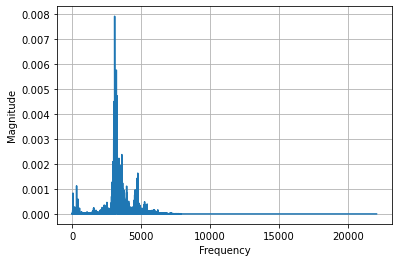

In [35]:
#fig, ax = plt.subplots()
plt.plot(xf, new_yf)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [12]:
data = [[] for _ in range(len(classes))]

for cls_number, cls_name in enumerate(classes):
    path = f"Data/{cls_name}/{cls_name}_"
    for i in range(samples_per_class):
        if cls_name == "Unknown" and i < 6:
            break
        fs,y=wavfile.read(path + f"{i}.wav")
        data[cls_number].append([fs, y])
print(data)

C:\Users\Timmy\AppData\Local\Temp\ipykernel_15024\3474043899.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,y=wavfile.read(path + f"{i}.wav")


[[[44100, array([   0,    0,    0, ..., 2302, 1488, -499], dtype=int16)], [44100, array([   0,    0,    0, ..., -116, -132,  -75], dtype=int16)], [44100, array([    0,     0,     0, ...,  -988, -1760, -1891], dtype=int16)], [44100, array([  0,   0,   0, ..., -59,  10,  50], dtype=int16)], [44100, array([   0,    0,    0, ..., -228, -244, -236], dtype=int16)], [44100, array([    0,     0,     0, ..., -2658, -4240, -5173], dtype=int16)], [44100, array([  0,   0,   0, ..., -39,  16,  22], dtype=int16)], [44100, array([    0,     0,     0, ..., -1128, -1714, -2140], dtype=int16)], [44100, array([   0,    0,    0, ..., 1818, 1673, 1205], dtype=int16)], [44100, array([  0,   0,   0, ..., 946, 844, 532], dtype=int16)], [44100, array([  0,   0,   0, ..., -24,   8,  42], dtype=int16)], [44100, array([   0,    0,    0, ...,  726, 1785, 2033], dtype=int16)], [44100, array([   0,    0,    0, ..., 1677, 2478, 2375], dtype=int16)], [44100, array([  0,   0,   0, ..., -29, 472, 592], dtype=int16)], [4

In [19]:
FFT_SIZE=1024
f,t,pxx = signal.spectrogram(y, nperseg=FFT_SIZE, fs=fs, noverlap=FFT_SIZE/2)
print("f:", f)
print("t:", t)
print("pxx:", pxx)
print(pxx.shape)

f: [    0.            43.06640625    86.1328125    129.19921875
   172.265625     215.33203125   258.3984375    301.46484375
   344.53125      387.59765625   430.6640625    473.73046875
   516.796875     559.86328125   602.9296875    645.99609375
   689.0625       732.12890625   775.1953125    818.26171875
   861.328125     904.39453125   947.4609375    990.52734375
  1033.59375     1076.66015625  1119.7265625   1162.79296875
  1205.859375    1248.92578125  1291.9921875   1335.05859375
  1378.125       1421.19140625  1464.2578125   1507.32421875
  1550.390625    1593.45703125  1636.5234375   1679.58984375
  1722.65625     1765.72265625  1808.7890625   1851.85546875
  1894.921875    1937.98828125  1981.0546875   2024.12109375
  2067.1875      2110.25390625  2153.3203125   2196.38671875
  2239.453125    2282.51953125  2325.5859375   2368.65234375
  2411.71875     2454.78515625  2497.8515625   2540.91796875
  2583.984375    2627.05078125  2670.1171875   2713.18359375
  2756.25        2799

In [16]:
FFT_SIZE=1024
data_spectrograms = [[] for _ in range(len(data))]
for cls in range(len(data)):
    if cls == 2 or cls == 3:
        continue
    for i in range(len(data[cls])):
        print(f"Trying class {cls} sample {i}")
        print("Length:", len(data[cls][i][1]))
        print("fs:", data[cls][i][0])
        if cls == 2 and i == 0:
            continue
        f,t,pxx = signal.spectrogram(data[cls][i][1], nperseg=FFT_SIZE, fs=data[cls][i][0], noverlap=FFT_SIZE/2)
        data_spectrograms[cls].append([f, t, pxx])
        print(f"class {cls} sample {i} completed")
print(data_spectrograms)

Trying class 0 sample 0
Length: 1374134
fs: 44100
class 0 sample 0 completed
Trying class 0 sample 1
Length: 1367078
fs: 44100
class 0 sample 1 completed
Trying class 0 sample 2
Length: 1367078
fs: 44100
class 0 sample 2 completed
Trying class 0 sample 3
Length: 1368842
fs: 44100
class 0 sample 3 completed
Trying class 0 sample 4
Length: 1361786
fs: 44100
class 0 sample 4 completed
Trying class 0 sample 5
Length: 1368842
fs: 44100
class 0 sample 5 completed
Trying class 0 sample 6
Length: 1358258
fs: 44100
class 0 sample 6 completed
Trying class 0 sample 7
Length: 1375898
fs: 44100
class 0 sample 7 completed
Trying class 0 sample 8
Length: 1356494
fs: 44100
class 0 sample 8 completed
Trying class 0 sample 9
Length: 1361786
fs: 44100
class 0 sample 9 completed
Trying class 0 sample 10
Length: 1363550
fs: 44100
class 0 sample 10 completed
Trying class 0 sample 11
Length: 1360022
fs: 44100
class 0 sample 11 completed
Trying class 0 sample 12
Length: 1372370
fs: 44100
class 0 sample 12 com

C:\Users\Timmy\AppData\Local\Temp\ipykernel_15024\3220151944.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("bone").copy()
  cmap.set_under(color='k', alpha=None)


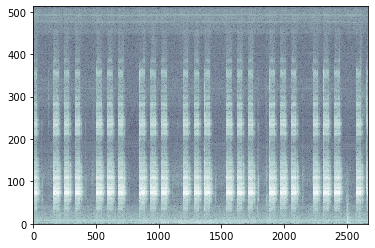

In [24]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
cmap=plt.cm.bone
cmap.set_under(color='k', alpha=None)
plt.pcolormesh(np.log10(pxx[:,:]),cmap=cmap)